# Assignment 2

In this Assignment, you will explore the **FIFA 19** dataset, which contains detailed attributes for every player registered in the latest edition of FIFA 19 database.    
It was scrapped from this [website](https://sofifa.com/), and you can find the source code [here](https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019).

Your goal is to find out how the `Overall` score by player is calculated

There are 2 main parts:

* Data Import & Cleaning, the output of this part is provided in the csv file `Assignment_2_data_cleaned`, **so you do not need to have everything right in this part to do the second one**
* Modeling with the cleaned data

In the notebook, there will be cells in the form `assert condition` like the next one. They are used to check if an answer is correct.  
Execute the next one and you will get no errors

In [1]:
assert 3 < 5

Execute the next one and you will get an error

In [2]:
#assert 3 > 5

# Data Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.1. Load the csv file `data.csv` into a dataframe called `df` and print its shape. (Set the right parameters when reading the csv file)       

In [4]:
df = pd.read_csv("Assignment_2_data.csv")
#print(df.info())
#first column useless we need to drop it

df.drop("Unnamed: 0",axis=1,inplace=True)
print(df.shape)

(18207, 88)


In [5]:
# check if your answer is correct
assert df.shape == (18207, 88)

1.2. print the head of `df`

In [6]:
print(df.head)

<bound method NDFrame.head of            ID                  Name  Age  \
0      158023              L. Messi   31   
1       20801     Cristiano Ronaldo   33   
2      190871             Neymar Jr   26   
3      193080                De Gea   27   
4      192985          K. De Bruyne   27   
5      183277             E. Hazard   27   
6      177003             L. Modrić   32   
7      176580             L. Suárez   31   
8      155862          Sergio Ramos   32   
9      200389              J. Oblak   25   
10     188545        R. Lewandowski   29   
11     182521              T. Kroos   28   
12     182493              D. Godín   32   
13     168542           David Silva   32   
14     215914              N. Kanté   27   
15     211110             P. Dybala   24   
16     202126               H. Kane   24   
17     194765          A. Griezmann   27   
18     192448         M. ter Stegen   26   
19     192119           T. Courtois   26   
20     189511       Sergio Busquets   29   
21

1.3. Print how many columns that are in df columns types

In [7]:
print(df.columns.dtype)

object


1.4. `to_drop` is a list containing columns that are not useful for modeling, remove them and print the new shape of `df`

In [8]:
to_drop =['ID', 'Name', 'Photo','Nationality', 'Flag','Club','Club Logo', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until']

df.drop(to_drop,axis=1,inplace=True)


In [9]:
# check if your answer is correct
assert df.shape == (18207, 77)

# Data Cleaning

## Handling missing values

2.1. Build a dataframe called `missing` which has the following format:

* `pct` is the percentage of missing values, **takes values between `0` and `100`**
* the index is the column names

|     | pct |
|-----|-----|
|......|.....|
|Strength |0.263635|
|.....|.....|



In [10]:
#missing = pd.DataFrame([(col,percentage) for col,percentage in (df.columns,(df[col].isna().sum()/len(df[col])))])
missing = pd.DataFrame([df.columns,df.isnull().sum()/len(df)])
#missing = pd.DataFrame([missing_val for missing_val in  ])
missing = missing.T # transpose the df to get it in the right orientation
missing.columns =['col','pct'] #rename columns
print(missing)

#missing = pd.DataFrame([df.isna().sum()/len(df),df.columns],columns=['pct','col'])
missing

                         col         pct
0                        Age           0
1                    Overall           0
2                  Potential           0
3                      Value           0
4                       Wage           0
5                    Special           0
6             Preferred Foot  0.00263635
7   International Reputation  0.00263635
8                  Weak Foot  0.00263635
9                Skill Moves  0.00263635
10                 Work Rate  0.00263635
11                 Body Type  0.00263635
12                  Position  0.00329544
13             Jersey Number  0.00329544
14                    Height  0.00263635
15                    Weight  0.00263635
16                        LS    0.114516
17                        ST    0.114516
18                        RS    0.114516
19                        LW    0.114516
20                        LF    0.114516
21                        CF    0.114516
22                        RF    0.114516
23              

,col,pct
0,Age,0
1,Overall,0
2,Potential,0
3,Value,0
4,Wage,0
5,Special,0
6,Preferred Foot,0.00263635
7,International Reputation,0.00263635
8,Weak Foot,0.00263635
9,Skill Moves,0.00263635


2.2. Remove from `missing`, rows with `pct`= 0   
sort `missing` in ascending order of `pct` and print its head

In [11]:
missing = missing[missing.pct != 0]
missing.sort_values('pct', ascending = 1)

,col,pct
6,Preferred Foot,0.00263635
60,Strength,0.00263635
59,Stamina,0.00263635
58,Jumping,0.00263635
57,ShotPower,0.00263635
56,Balance,0.00263635
55,Reactions,0.00263635
54,Agility,0.00263635
53,SprintSpeed,0.00263635
61,LongShots,0.00263635


2.3. Now, let's fill missing values where the % of missing is lower than 1 (1%).   
First identify these columns in a list named `cols_to_fill`

In [12]:
# your code here
cols_to_fill = missing.query('pct < 0.01').col.tolist()
print(len(cols_to_fill), type(cols_to_fill))
print(cols_to_fill)

44 <class 'list'>
['Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [13]:
# check if your answer is correct
assert len(cols_to_fill) == 44; assert isinstance(cols_to_fill, list)

2.4. define a function (`fill_nas_by_type`) to fill null values by column type:

* if a column type is `Object`, fill it with the **most frequent value**
* otherwise, fill it with the **median value**

In [14]:
def fill_nas_by_type(df, col_name):
    """Fill null values in df according to col_name type
    
    Parameters
    ----------
    df : dataframe, (default=None)
        input dataframe
    col_name : str, (default=None)
        column with null values to fill
        
    Returns
    -------
    df with filled values in col_name
    """
    # your code here
    if df[col_name].dtype == object:
        mode = df[col_name].mode()
        df[col_name] = df[col_name].fillna(mode[0])
    else:
        median = df[col_name].median()
        df[col_name] = df[col_name].fillna(median)
    return df

Loop through `cols_to_fill` and apply the defined function `fill_nas_by_type` to fill null values

In [15]:
for col in cols_to_fill:
    #print(col)
    df=fill_nas_by_type(df,col)

In [16]:
# check if your answer is correct
assert df[cols_to_fill].isnull().sum().sum() == 0

For the remaining missing values, let's just remove them.    
Print the shape of `df` before and after removing any rows with missing observations

In [17]:
# your code here
print(df.shape)

df = df.dropna() #drops rows where na values appear

print(df.shape)

(18207, 77)
(14743, 77)


In [18]:
# check if your answer is correct
assert df.shape == (14743, 77); assert df.isnull().sum().sum() == 0

## Correct some columns format

### Monetary columns

In [19]:
money_cols = ['Value','Wage', 'Release Clause']
df[money_cols].head()

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
4,€102M,€355K,€196.4M
5,€93M,€340K,€172.1M


3.1. Build a function which extracts the monetary value from a string. It should return a number with no decimals.   
Your function should pass the three tests in the cell after

In [20]:
def get_value(value_text):
    """Extract the monetary value from a string
    
    Parameters
    ----------
    value_text: str, (default=None)
        a string containing a number ending with M, K or nothing
        
    Returns
    -------
    a float with no decimals
    
    Examples
    --------
    >>> get_value('€7.1K')
    7100.0
    """
    multiplier = value_text[-1]
    if multiplier == 'M':
        number = float(value_text[1:-1])
        return number * 1000000
    elif multiplier == 'K':
        number = float(value_text[1:-1])
        return number * 1000
    else:
        return float(value_text[1:])


In [21]:
# check if your answer is correct
assert get_value('€110.5M') == 110500000; assert get_value('€7.1K') == 7100; assert get_value('€200') == 200

3.2. Loop through `money_cols` and apply the defined function `get_value` to convert them to numeric

In [22]:
for f in money_cols:
    df[f] =df[f].apply(get_value)
    print(f, df[f].dtype, df[f].isnull().sum())

Value float64 0
Wage float64 0
Release Clause float64 0


In [23]:
# check if your answer is correct
assert df[money_cols].isnull().sum().sum() == 0

### Height and Weight columns

4.1. Start by printing the unique values for `Height`

In [24]:
# print unique values for Height
df['Height'].unique()

array(["5'7", "6'2", "5'9", "5'11", "5'8", "6'0", "5'6", "5'10", "6'1",
       "5'4", "6'3", "6'4", "5'5", "6'6", "6'5", "5'3", "5'2", "6'7",
       "5'1", "6'8"], dtype=object)

4.2. Write a function (`get_height`) which converts the Height from a string in feet to  a number in `cm` with no decimals.    
1 feet = 30.48 cm. For example `get_height("5'10")` = `155`

In [25]:
def get_height(x):
    return  round(float(x.replace("'", ".")) * 30.48, 0) 

In [26]:
# check if your answer is correct
assert get_height("5'10") == 155; assert get_height("6'8") == 207

Apply the previous defined function on `Height`

In [27]:
df['Height'] = df['Height'].apply(get_height)

In [28]:
# check if your answer is correct
assert df['Height'].dtype == 'float64'; assert df['Height'].isnull().sum() == 0

4.3. The same thing with `Weight`, print the unique values

In [29]:
# print unique values for Weight
df['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '154lbs', '163lbs', '146lbs',
       '190lbs', '181lbs', '176lbs', '168lbs', '172lbs', '148lbs',
       '165lbs', '196lbs', '161lbs', '170lbs', '187lbs', '157lbs',
       '185lbs', '130lbs', '174lbs', '203lbs', '207lbs', '134lbs',
       '141lbs', '152lbs', '179lbs', '132lbs', '198lbs', '201lbs',
       '209lbs', '214lbs', '143lbs', '192lbs', '137lbs', '194lbs',
       '139lbs', '220lbs', '205lbs', '216lbs', '126lbs', '123lbs',
       '128lbs', '223lbs', '212lbs', '121lbs', '115lbs', '218lbs',
       '117lbs', '243lbs', '110lbs', '119lbs', '234lbs'], dtype=object)

4.4. Write a function (`get_weight`) which converts the **Weight** from a string in `lbs` to a number in `kg` with no decimals.    
1 lbs = 0.453592 kg. For example `get_weight("115lbs")` = `52`

In [30]:
def get_weight(x):
    return  round(float(x.split('lbs')[0]) * 0.453592, 0)

In [31]:
# check if your answer is correct
assert get_weight("115lbs") == 52; assert get_weight("234lbs") == 106

Apply the previous defined function on `Weight`

In [32]:
df['Weight'] = df['Weight'].apply(get_weight)

In [33]:
# check if your answer is correct
assert df['Weight'].dtype == 'float64'; assert df['Weight'].isnull().sum() == 0
df.shape

(14743, 77)

## Convert text columns to numeric

5.1. Identify non-numeric text columns in a list called `text_cols`

In [34]:
# your code here
text_cols = []
for col in df.columns:
    if df[col].dtype== object:
        text_cols.append(col)

print(len(text_cols))

30


5.2. Build a list named `cols_to_remove` containing columns from `text_cols`, if a column has a number of unique values greater than **10** (`> 10`)

In [35]:
# your code here
cols_to_remove = []
for col in text_cols:
    if len(df[col].unique()) > 10:
        cols_to_remove.append(col)
print(len(cols_to_remove))

27


remove `cols_to_remove` columns from `df` and print its shape

In [36]:
df = df.drop(cols_to_remove,axis=1,inplace=False)
print(df.shape)

(14743, 50)


In [37]:
# check if your answer is correct
assert df.shape == (14743, 50)

5.3. Identify the remaining text columns in `text_cols` as `remaining_text_cols`, make sur it passes the test after

In [38]:
# your code here
remaining_text_cols = [x for x in text_cols if x  not in cols_to_remove ]
print(len(remaining_text_cols))

3


In [39]:
# check if your answer is correct
assert remaining_text_cols == ['Preferred Foot', 'Work Rate', 'Body Type']

5.4. Loop through `remaining_text_cols` and convert them to numerical values

In [40]:
pref_foot_dict = { 'Left': 0, 'Right': 1}
work_rate_dict = {'High/ High': 9,'High/ Medium': 8, 'High/ Low': 7 ,'Medium/ High': 6, 'Medium/ Medium': 5, 'Medium/ Low': 4,'Low/ High':3 , 'Low/ Medium':2, 'Low/ Low':1}
body_type_dict = {'Messi': 1, 'C. Ronaldo': 2, 'Neymar': 3, 'Normal': 4, 'Lean': 5 ,'Stocky': 6,'PLAYER_BODY_TYPE_25': 7, 'Shaqiri': 8, 'Akinfenwa':9}

for key,val in pref_foot_dict.items():
    df['Preferred Foot'].replace(key,val,inplace=True)

for key,val in work_rate_dict.items():
    df['Work Rate'].replace(key,val,inplace=True)

for key,val in body_type_dict.items():
    df['Body Type'].replace(key,val,inplace=True)
    
print(df[remaining_text_cols])

       Preferred Foot  Work Rate  Body Type
0                   0          5          1
1                   1          7          2
2                   1          8          3
4                   1          9          4
5                   1          8          4
6                   1          9          5
7                   1          8          4
8                   1          8          4
10                  1          8          4
11                  1          5          4
12                  1          6          5
13                  0          8          4
14                  1          6          5
15                  0          8          4
16                  1          9          4
17                  0          9          5
20                  1          5          5
21                  1          9          5
23                  1          8          6
24                  0          6          4
25                  1          8          5
26                  0          8

In [41]:
df.shape

(14743, 50)

# Model building

As stated before, you can do this part without completing the previous one

6.1. Load the cleaned dataset `Assignment_2_data_cleaned.csv` into `df_clean` and print its shape.    

In [42]:
df_clean = pd.read_csv("Assignment_2_data_cleaned.csv")
print(df_clean.shape)

(14743, 50)


6.2. Load the target variable `Overall` into a dataframe and name it `y`. Then, load the features into a second dataframe and name it `X`. Plot a histogram of `y`, choose the number of bins as 100.

(array([  1.,   0.,  18.,   0.,  26.,   0.,  28.,   0.,  73.,   0., 104.,
          0., 118.,   0., 148.,   0., 190.,   0., 199.,   0., 261.,   0.,
        313.,   0.,   0., 344.,   0., 424.,   0., 514.,   0., 585.,   0.,
        690.,   0., 809.,   0., 913.,   0., 837.,   0., 953.,   0., 933.,
          0., 829.,   0., 778.,   0.,   0., 742.,   0., 640.,   0., 613.,
          0., 492.,   0., 434.,   0., 407.,   0., 311.,   0., 258.,   0.,
        139.,   0., 147.,   0., 117.,   0.,  85.,   0.,   0.,  82.,   0.,
         55.,   0.,  38.,   0.,  30.,   0.,  21.,   0.,  12.,   0.,  12.,
          0.,   8.,   0.,   4.,   0.,   5.,   0.,   1.,   0.,   0.,   0.,
          2.]),
 array([46.  , 46.48, 46.96, 47.44, 47.92, 48.4 , 48.88, 49.36, 49.84,
        50.32, 50.8 , 51.28, 51.76, 52.24, 52.72, 53.2 , 53.68, 54.16,
        54.64, 55.12, 55.6 , 56.08, 56.56, 57.04, 57.52, 58.  , 58.48,
        58.96, 59.44, 59.92, 60.4 , 60.88, 61.36, 61.84, 62.32, 62.8 ,
        63.28, 63.76, 64.24, 64.72

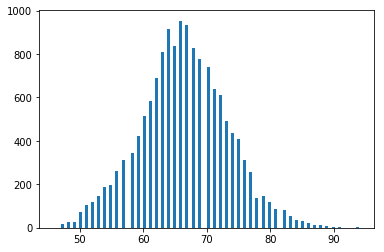

In [43]:

y = df['Overall']
X = df.drop('Overall',axis=1,inplace= False)

plt.hist(y,bins=100)

7. Split the data set into a training set and a test set. Choose `test_size` = 0.3 and `random_state` = 123  
Print train and test size      
**Attention**: You are asked to use  [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [44]:
# your code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train ,y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)
print("train size :", len(X_train))
print("test size :",len(X_test))

train size : 10320
test size : 4423


8. Fit a linear model to the training set, and then report the training and testing errors obtained (the R2 statistic).   
Calculate and print the following metrics: mse, rmse, mae for the test_set

In [45]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

train_score = reg.score(X_train,y_train)
test_score = reg.score(X_test,y_test)

print("Train score :",train_score)
print("Test score :",test_score)



Train score : 0.9368939211949172
Test score : 0.936075846877686


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse) # ?? probably not good formula...
mae = mean_absolute_error(y_test,y_pred)

print("Mean squared error :",mse)
print("Root mean squared error :",rmse)
print("Mean absolute error :",mae)

Mean squared error : 2.990712811089919
Root mean squared error : 1.7293677489446595
Mean absolute error : 1.3513544282534065


### Check residuals

9.1. Plot a histogram of the residuals (difference between `y_test` and `y_pred`

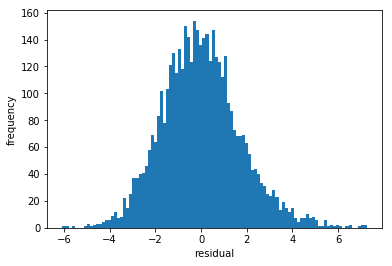

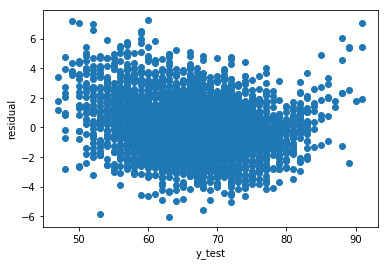

In [47]:
resid = y_pred - y_test

plt.hist(resid,bins=100)
plt.xlabel("residual")
plt.ylabel("frequency")
plt.show()
plt.scatter(y_test, resid)
plt.xlabel("y_test")
plt.ylabel("residual")
plt.show()

9.2. Plot a scatter plot where `y_test` is in the **x** axis and  `y_pred` is in the **y** axis

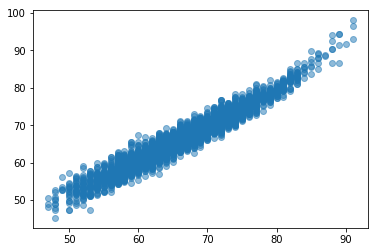

In [48]:
plt.scatter(y_test,y_pred, alpha = 0.5)

10. Try to improve the performance of your model, by adding new features

In [49]:
#will 'stretch' a feature depending on the number of unique values present in the column
def feature_stretch(col,df):
    #for each unique value in that column
    for unique_val in df[col].unique():
        #create a new column just for that value
        unique_name = col + "_is_" + str(unique_val)
        df[unique_name] = np.where(df[col] == unique_val,1,0)
    df.drop(col,axis=1,inplace=True)
    return df

def split_train_test(df):
    from sklearn.model_selection import train_test_split
    X = df.drop("Overall",axis=1)
    y = df["Overall"]
    X_train,X_test,y_train ,y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)
    return X_train,X_test,y_train,y_test

In [50]:
#feature engineering to stretch some features that will improve our model performance
df = feature_stretch("Age",df) #age has the most impact on model improvement (around 3%)
df = feature_stretch("Preferred Foot",df)
df = feature_stretch("Work Rate",df)

In [54]:

from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = split_train_test(df)

reg = LinearRegression()
reg.fit(X_train,y_train)

print("Train score :",train_score)
print("Test score :",test_score)

train_score_improved = reg.score(X_train,y_train)
test_score_improved = reg.score(X_test,y_test)

print("Train score improved :",train_score_improved)
print("Test score improved :",test_score_improved)

delta_train = (train_score_improved - train_score)
delta_test = (test_score_improved - test_score)

print("delta train improvement =",delta_train)
print("delta test improvement =",delta_test)


Train score : 0.9368939211949172
Test score : 0.936075846877686
Train score improved : 0.964221204935821
Test score improved : 0.9629465109190063
delta train improvement = 0.027327283740903763
delta test improvement = 0.026870664041320325


In [52]:
#testing out lasso and ridge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge(alpha = 0.0)
ridge.fit(X_train,y_train)

train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)


print  ('Ridge train score =', train_score_ridge)
print  ('Ridge test score = ', test_score_ridge)

delta_train = (train_score_ridge - train_score)
delta_test = (test_score_ridge - test_score)

print("delta ridge train improvement =",delta_train)
print("delta ridge test improvement =",delta_test)


lasso = Lasso(alpha = 1.0)
lasso.fit(X_train,y_train)


train_score_lasso = lasso.score(X_train, y_train)
test_score_lasso = lasso.score(X_test, y_test)

print  ('Lasso train score =', train_score_lasso)
print  ('Lasso test score = ', test_score_lasso) 




Ridge train score = 0.9642212049161398
Ridge test score =  0.9629466056799557
delta ridge train improvement = 0.027327283721222617
delta ridge test improvement = 0.026870758802269745
Lasso train score = 0.8937386102996726
Lasso test score =  0.8967710018626636


The improvement from using ridge and lassso is very minimal, feature engineering gives much better results